# NMR Analysis of POSS-triol Catalyzed Indole Addition Reaction

In this notebook we will analyze $^{19}$F NMR kinetics data for the reaction shown below:

![Indole Reaction](https://kncrabtree.github.io/che155/assets/images/week3/poss-indole.png)

The trifluoromethlynitrostyrene reactant **A**, the internal standard **D**, and product **E** were observed with NMR. The kinetics data are contained inside the `data` folder, which contains multiple subfolders. Each folder is a single time point, and the name of the folder is the time in minutes. Inside each time folder are three csv files:
- `S.csv` contains the data for the internal standard **D** at -113.2 ppm
- `R.csv` contains the data for the reactant **A** at -62.9 ppm
- `P.csv` contains the data for the product **E** at -62.2 ppm

## Inspecting the Data

The first thing to do is take a look at the data files. We'll choose the first folder (`0007`) and read in the three csv files using `pandas`.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

R = pd.read_csv('data/0007/R.csv')
P = pd.read_csv('data/0007/P.csv')
S = pd.read_csv('data/0007/S.csv')

R

,delta,y
0,-62.779996,0.000000
1,-62.780902,-93753.619553
2,-62.781809,-292482.265662
3,-62.782715,-361326.972387
4,-62.783622,-137424.679087
...,...,...
216,-62.975782,0.000000
217,-62.976688,36679.333834
218,-62.977594,258846.222354
219,-62.978501,317808.060478


Each file contains a column `'delta'` with the chemical shifts, and `'y`' with the NMR data points. Using matplotlib, we can easily plot the three dataframes. The units of the x axis are chemical shift ($\delta$) in ppm, and the units on the y axis are arbitrary so it is fine to leave that axis unlabeled.

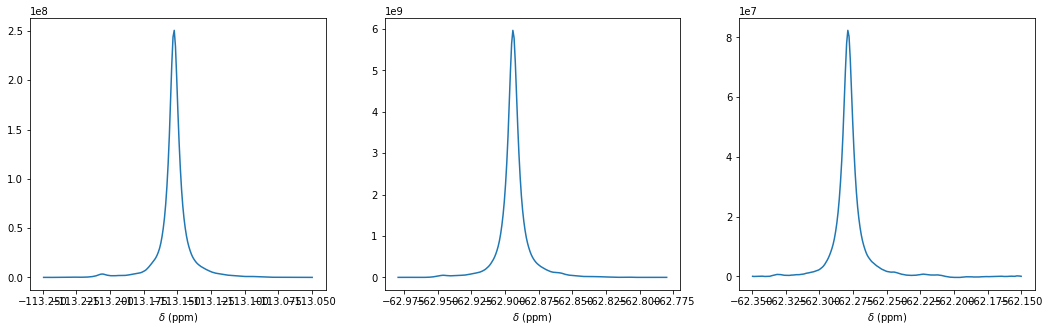

In [2]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
for ax,df in zip(axes,[S,R,P]):
    ax.plot(df['delta'],df['y'])
    ax.set_xlabel(r'$\delta$ (ppm)')

Notice how the labels on the x axis are overlapping. This is because matplotlib is using too many ticks for the number of digits being displayed. One way to fix this is to set the tick positions manually. We can take the first $\delta$ value, the middle $\delta$ value, and the last $\delta$ value if we want 3 ticks:

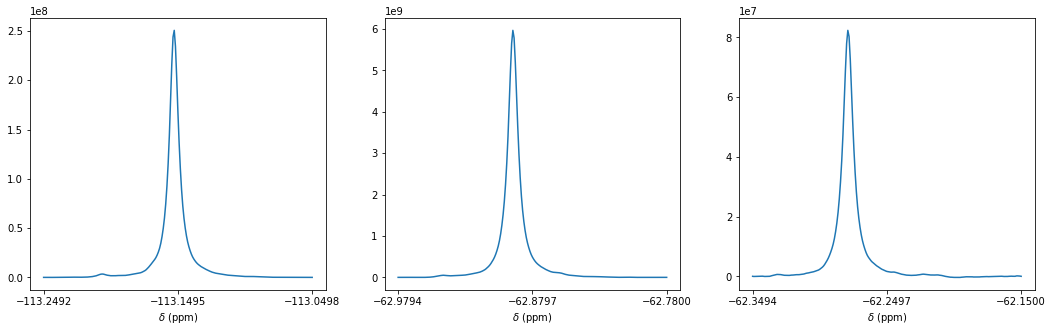

In [3]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
for ax,df in zip(axes,[S,R,P]):
    ax.plot(df['delta'],df['y'])
    ax.set_xlabel(r'$\delta$ (ppm)')
    x = df['delta'].to_numpy()
    ax.set_xticks([x[0],x[x.size//2],x[-1]])

Alternatively, we can customize the [tick locator](https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html) for the plot axis. More complete documentation is available in the [Ticker API](https://matplotlib.org/3.3.3/api/ticker_api.html). To achieve similar results as manually locating 3 ticks, we can use the `LinearLocator` with `numticks` set to 3:

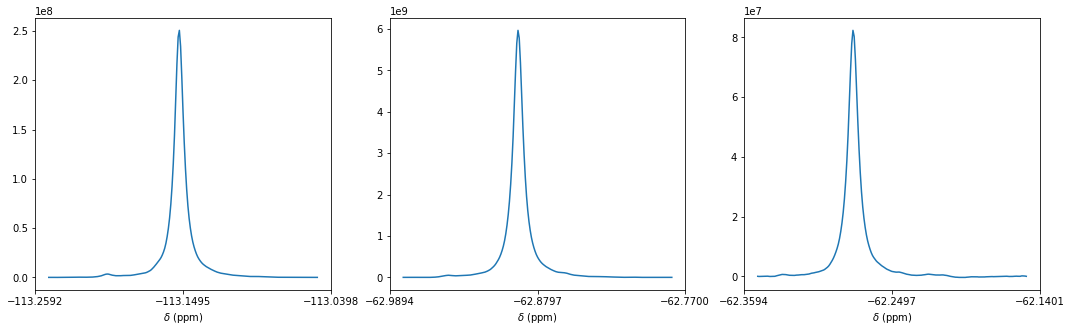

In [4]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
for ax,df in zip(axes,[S,R,P]):
    ax.plot(df['delta'],df['y'])
    ax.set_xlabel(r'$\delta$ (ppm)')
    ax.xaxis.set_major_locator(plt.LinearLocator(numticks=3))

More aesthetically pleasing results can be obtained with the `MaxNLocator`:

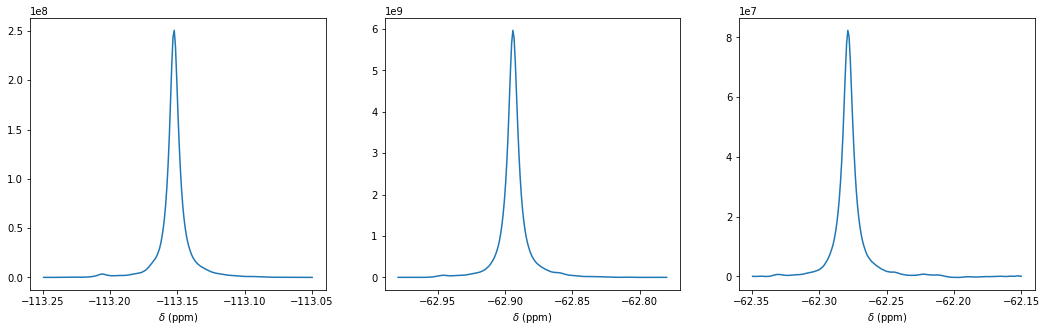

In [5]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
for ax,df in zip(axes,[S,R,P]):
    ax.plot(df['delta'],df['y'])
    ax.set_xlabel(r'$\delta$ (ppm)')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

It would be tedious to inspect all of the data one-by-one, so instead we can load in all the data at once and plot it. First we want to get a list of all of the folders. We could type it in manually, or make use of python's [`os.listdir`](https://docs.python.org/3/library/os.html#os.listdir) function:

In [6]:
import os

dirs = os.listdir('data')
dirs.sort()
dirs

['0007',
 '0037',
 '0067',
 '0097',
 '0127',
 '0158',
 '0187',
 '0217',
 '0246',
 '0276',
 '0307',
 '0337',
 '0367',
 '0397',
 '0427',
 '0457',
 '0487',
 '0557',
 '0617',
 '0677',
 '0797',
 '0921',
 '1038',
 '1158',
 '1278']

With the list of folders in hand, we can create a list of dataframes for each molecule, and graph them:

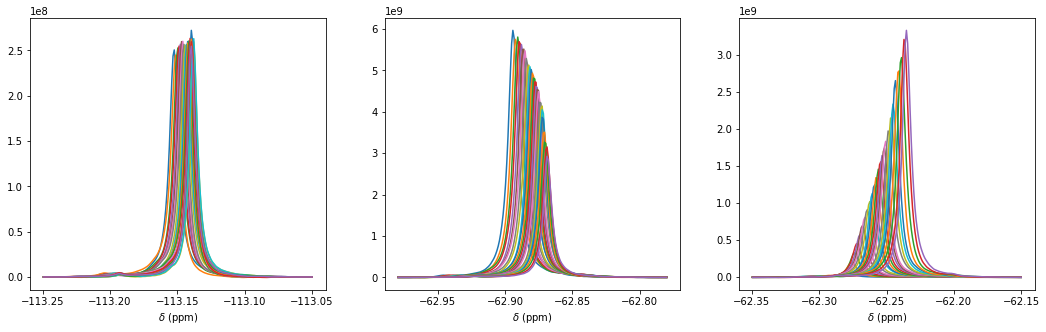

In [7]:
P = []
R = []
S = []

for d in dirs:
    P.append(pd.read_csv(f'data/{d}/P.csv'))
    R.append(pd.read_csv(f'data/{d}/R.csv'))
    S.append(pd.read_csv(f'data/{d}/S.csv'))

fig,axes = plt.subplots(1,3,figsize=(18,5))
for ax,l in zip(axes,[S,R,P]):
    for df in l:
        ax.plot(df['delta'],df['y'])
            
    ax.set_xlabel(r'$\delta$ (ppm)')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))


It's a bit hard to tell what's going on in these plots. One way to make it cleaner is to highlight the first and last time points, and make the other ones mostly transparent and gray:

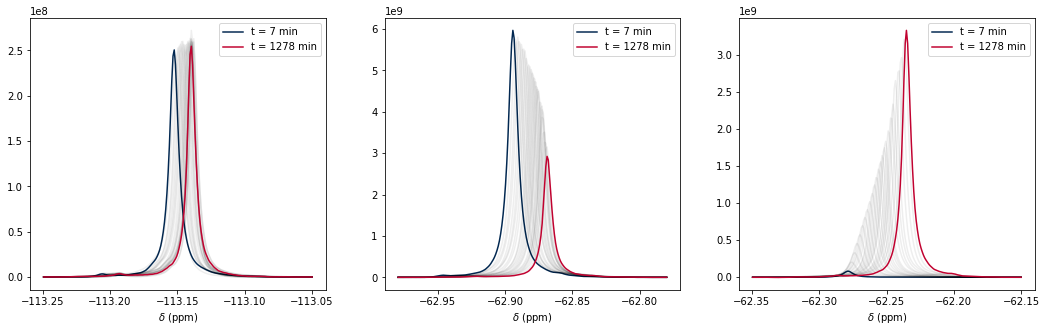

In [8]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
for ax,l in zip(axes,[S,R,P]):
    for i,df in enumerate(l):
        if i == 0:
            ax.plot(df['delta'],df['y'],c='#022851',label=f't = {int(dirs[i])} min')
        elif i == len(dirs)-1:
            ax.plot(df['delta'],df['y'],c='#c10230',label=f't = {int(dirs[i])} min')
        else:
            ax.plot(df['delta'],df['y'],color='#00000011')
            
    ax.set_xlabel(r'$\delta$ (ppm)')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
axes[0].legend()
axes[1].legend()
axes[2].legend()

We can see that each peak drifts to the right over time; this is a well-known phenomenon in $^{19}$F NMR spectroscopy. We are less interested in the drift, but more interested in the area beneath the peaks. The area under the internal standard curve remains more or less constant, while the reactant decreases over time and the product increases as we would expect.

Another common visualization for data that has both a frequency and time axis is a waterfall plot. Matplotlib does not have a built-in waterfall plot function, but it is possible to make them. The implementation below is a bit fancy because it also colors the data. It makes use of the [`matplotlib.colors.Normalize`](https://matplotlib.org/api/_as_gen/matplotlib.colors.Normalize.html) object to make sure that each line on the plot uses the same color scale as well as the [`matplotlib.collections.LineCollection`](https://matplotlib.org/gallery/shapes_and_collections/line_collection.html) object to represent a set of lines on the plot. Each individual spectrum is converted into a LineCollection, which contains a line connecting each (x,z) pair of data points in the spectrum.

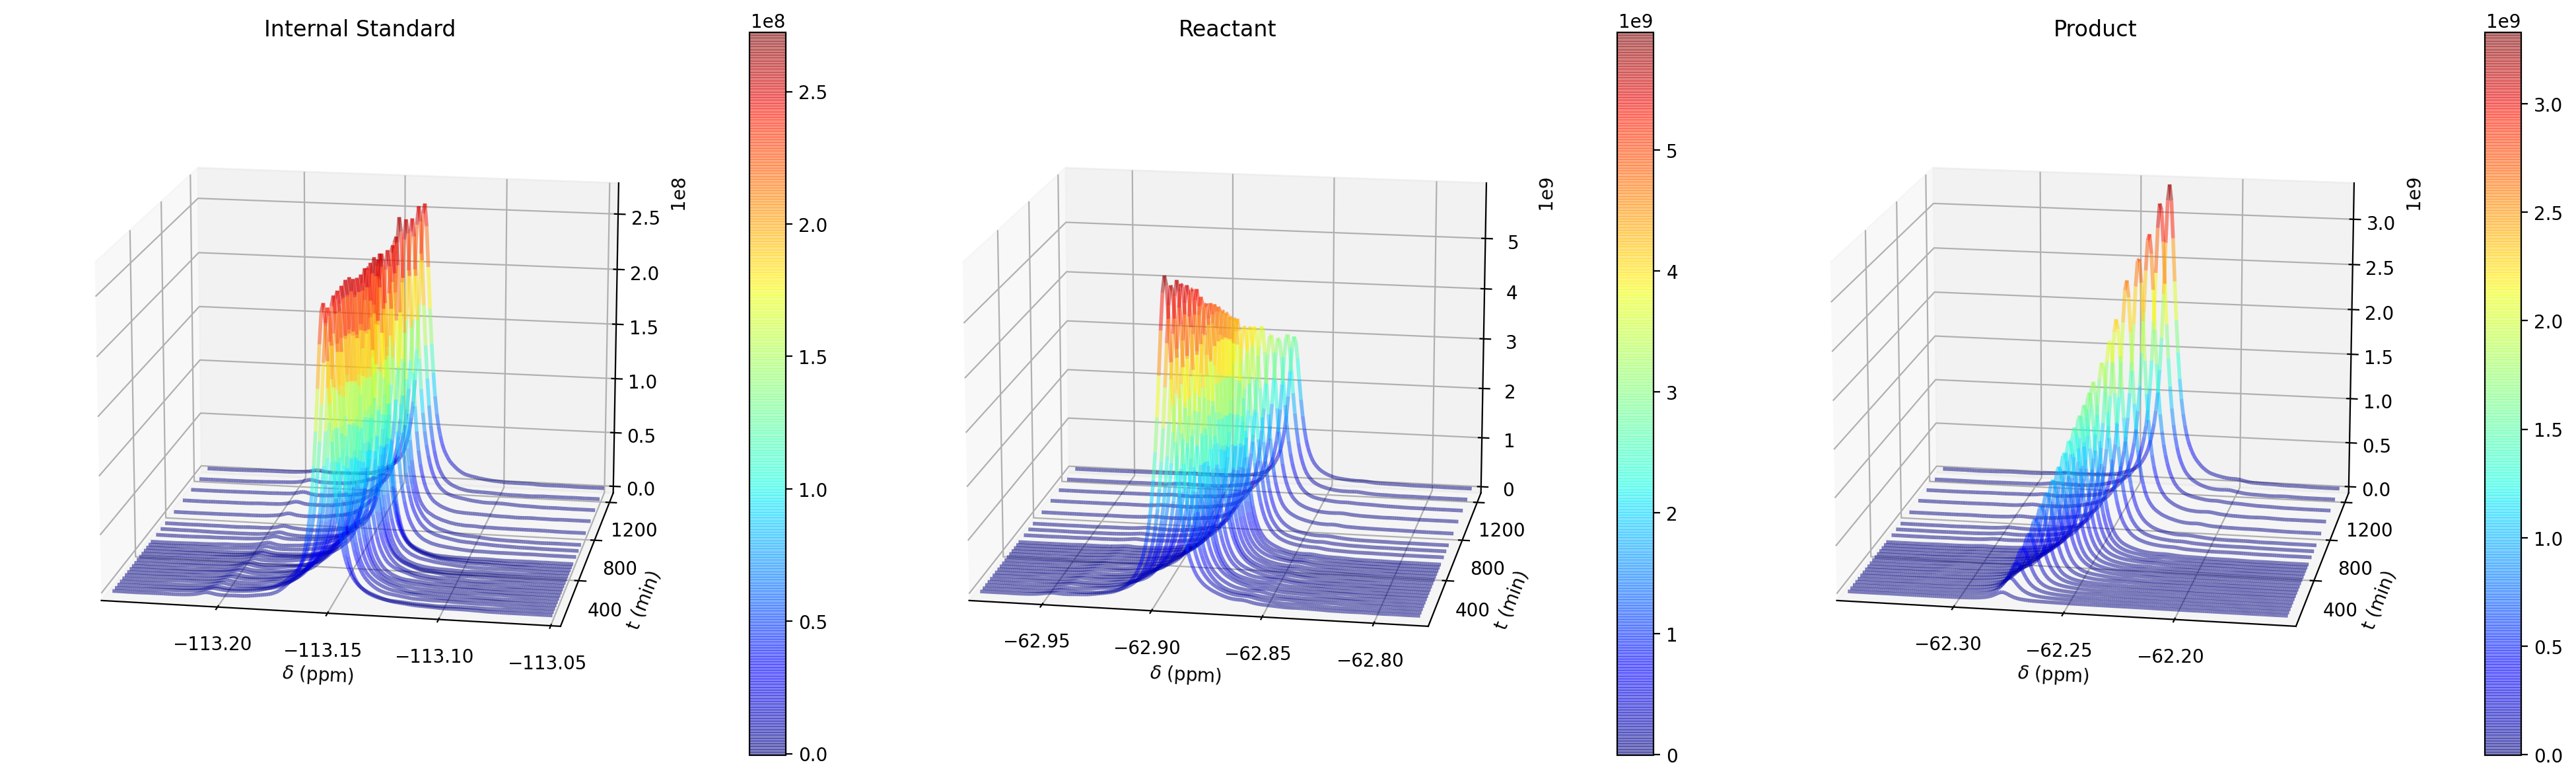

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection


def waterfall(fig,ax,Z,x,y):
    norm = plt.Normalize(Z.min(),Z.max())
    
    #loop over each column in Z
    #we want to add a LineCollection for each spectrum
    #the linecollection consists of a series of line segments connecting the points
    #each line segment has 2 xy values: the first goes from (x0,y0) to (x1,y1); the next from (x1,y1) to (x2,y2), and so on
    for i,z in enumerate(Z[:,].T):
        
        #create an array of (x,y) values, insert a dummy axis that will be used for concatenation
        #pz.shape = (N,1,2) where N = number of points in the spectrum
        #pz[0] is an array of length 1 that contains an array [x0,z0]
        pz = np.array([x,z]).T.reshape(-1,1,2)
        
        #we want each segment to be an array with shape(2,2) that will contain the values [[x_n,zn],[x_n+1,z_n+1]]
        #so we take the list of all points but the last, and tack on a list of all points but the first.
        #using np.concatenate, we perform the concatenation along axis 1
        #as a result, p will have shape(2N-1,2,2)
        p = np.concatenate([pz[:-1],pz[1:]],axis=1)
        
        #create the line collection, and color each segment with the average of its two z values
        lc = LineCollection(p, cmap='jet', norm=norm, array=(z[1:]+z[:-1])/2, linewidths=2,alpha=0.5)
        
        #add the collection to the plot, giving it a y value corresponding to the appropriate time value
        ax.add_collection3d(lc,zs=y[i],zdir='y')
    
    ax.set_xlim3d(x.min(),x.max())
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel(r'$\delta$ (ppm)')
    ax.set_ylim3d(y.min(),y.max())
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_ylabel(r't (min)')
    ax.set_zlim3d(Z.min(),Z.max())
    fig.colorbar(lc)

#create 2D numpy array containing all the spectra for each molecule:
Parr = np.zeros((len(P[0]['delta']),len(dirs)))
Rarr = np.zeros((len(R[0]['delta']),len(dirs)))
Sarr = np.zeros((len(S[0]['delta']),len(dirs)))
for i in range(0,len(dirs)):
    Parr[:,i] = P[i]['y'].to_numpy()
    Rarr[:,i] = R[i]['y'].to_numpy()
    Sarr[:,i] = S[i]['y'].to_numpy()

#create array for the chemical shift axis; it is the same for all time points.
Pdelta = P[0]['delta']
Rdelta = R[0]['delta']
Sdelta = S[0]['delta']

#create an array of time values
time = np.array(dirs,dtype=np.int)


fig = plt.figure(figsize=(20,6),dpi=200)
ax = fig.add_subplot(131,projection='3d')
waterfall(fig,ax,Sarr,Sdelta,time)
ax.view_init(elev=15,azim=-80)
ax.set_title('Internal Standard')

ax = fig.add_subplot(132,projection='3d')
waterfall(fig,ax,Rarr,Rdelta,time)
ax.view_init(elev=15,azim=-80)
ax.set_title('Reactant')

ax = fig.add_subplot(133,projection='3d')
waterfall(fig,ax,Parr,Pdelta,time)
ax.view_init(elev=15,azim=-80)
ax.set_title('Product')

fig.tight_layout()

Of course, we can also use `pcolormesh` for a false color plot. There is a lot of value in being comfortable with visualizing the data in different ways!

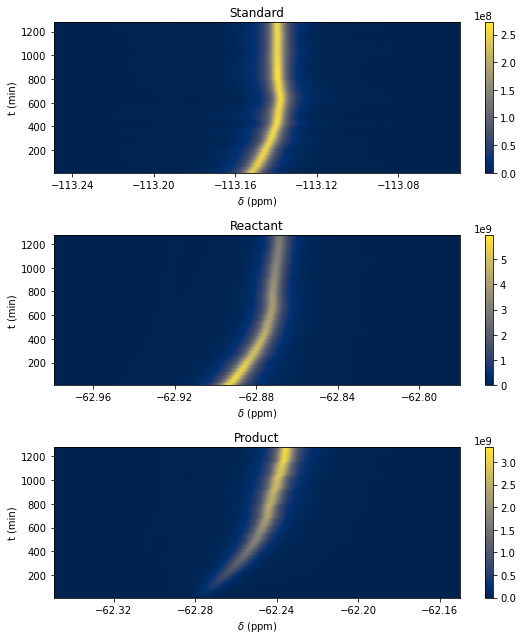

In [10]:
fig,axes = plt.subplots(3,1,figsize=(8,9))

p1 = axes[0].pcolormesh(Sdelta,time,Sarr.T,shading='gouraud',cmap='cividis')
fig.colorbar(p1,ax=axes[0])
axes[0].set_title("Standard")
axes[0].xaxis.set_major_locator(plt.MaxNLocator(5))
axes[0].set_xlabel(r'$\delta$ (ppm)')
axes[0].set_ylabel('t (min)')

p2 = axes[1].pcolormesh(Rdelta,time,Rarr.T,shading='gouraud',cmap='cividis')
axes[1].set_title("Reactant")
axes[1].xaxis.set_major_locator(plt.MaxNLocator(5))
axes[1].set_xlabel(r'$\delta$ (ppm)')
axes[1].set_ylabel('t (min)')
fig.colorbar(p2,ax=axes[1])

p3 = axes[2].pcolormesh(Pdelta,time,Parr.T,shading='gouraud',cmap='cividis')
axes[2].set_title("Product")
axes[2].xaxis.set_major_locator(plt.MaxNLocator(5))
axes[2].set_xlabel(r'$\delta$ (ppm)')
axes[2].set_ylabel('t (min)')
fig.colorbar(p3,ax=axes[2])

fig.tight_layout()

## Peak Integration

Our goal is to determine the concentration of the reactant and product as a function of time. In $^{19}$F NMR spectroscopy, the peak area $A$ is proportional to the concentration of the molecule \[**X**\] times the number of F atoms that give rise to the peak $N_F$:

$$ A = \chi N_F[\textbf{X}] $$

where $\chi$ is the instrumental response factor (which is equal for each peak). We have 3 molecules: the internal standard **S** which has a known concentration of 0.11 M, the reactant **R**, and the product **P**. The signals from **R** and **P** cone from a trifluoromethyl group, while the signal from **S** comes from a single F atom. Therefore we can write:

$$ A_\textbf{S} = \chi 0.11\text{ M} $$
$$ A_\textbf{R} = \chi 3[\textbf{R}] $$
$$ A_\textbf{P} = \chi 3[\textbf{P}] $$

Dividing equations cancels $\chi$ and allows us to solve for the concentrations of **R** and **P**:

$$ [\textbf{R}] = \frac{0.11\text{ M}}{3}\frac{A_\textbf{R}}{A_\textbf{S}}, \quad [\textbf{P}] = \frac{0.11\text{ M}}{3}\frac{A_\textbf{P}}{A_\textbf{S}} $$

To determine the concentrations, we need to calculate the peak areas. For a peak described by a 1D function $f(x)$, the peak area is given by its integral:

$$ A = \int_{-\infty}^{\infty} f(x)\,\text{d}x $$

However, we do not have a continuous function $f(x)$; we have a discrete set of $N$ data points $f(x_1), f(x_2), \ldots, f(x_N)$. Instead, we can approximate the integral as a [Riemann Sum](https://en.wikipedia.org/wiki/Riemann_sum), which is like adding up a set of rectangles located at each datapoint:

$$ \int_a^b f(x)\,\text{d}x \approx \sum_i f(x_i) \Delta x_i $$

where $a$ and $b$ are the endpoints of the integration, and $\Delta x_i$ is $|x_i - x_{i+1}|$, the spacing between points $x_i$ and $x_{i+1}$. A discrete Riemann sum can be computed as either a left-sum or a right-sum, illustrated below as a function of the point spacing:

$$ \text{Left sum} = \sum_{i=1}^{N-1} f(x_i) \Delta x_i, \quad \text{Right sum} = \sum_{i=1}^{N-1} f(x_{i+1}) \Delta x_i$$

| Left Sum | Right Sum |
| --- | --- |
| [![Left Sum Image 09glasgow09 CC-BY-SA-3.0](https://upload.wikimedia.org/wikipedia/commons/1/19/Riemann_sum_%28leftbox%29.gif)](https://commons.wikimedia.org/w/index.php?curid=7697902) | [![Right Sum Image 09glasgow09 CC-BY-SA-3.0](https://upload.wikimedia.org/wikipedia/commons/6/61/Riemann_sum_%28rightbox%29.gif)](https://commons.wikimedia.org/w/index.php?curid=7697920) |

The smaller $\Delta x_i$, the more accurate the integral, and in the limit that $\Delta x_i \to 0$, all three methods yield the same value, which is equal to the integral. As a special case, if all of the data points are evenly spaced, then $\Delta x$ is a constant, and the integral is proportional to the sum of the data points (show here as the left sum):

$$ \int_a^b f(x)\,\text{d}x \quad \approx \quad \sum_{i=1}^{N-1} f(x_i) \Delta x_i \quad = \quad \Delta x\sum_{i=1}^{N-1} f(x_i) \quad \propto \quad \sum_{i=1}^{N-1} f(x_i) $$

Fortunately for us, our data are evenly spaced. And since we only care about the ratios of the areas, the factors of $\Delta x$ will cancel when we calculate concentration anyways, so we can make use of the [`numpy.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) function. This function takes an array as an argument and returns an array whose elements are the cumulative sum of the elements of the input. For example:

In [11]:
np.cumsum(np.array([1,2,3,4,5,6]))

array([ 1,  3,  6, 10, 15, 21])

If we want to estimate the area under the curve $f(x) = x$ from $x=1$ to $x=6$, with $\Delta x = 1$ we can use `numpy.cumsum`:

In [12]:
fx = np.array([1,2,3,4,5,6])
ls = np.cumsum(fx[:-1]) #add all the points except the last
rs = np.cumsum(fx[1:]) # add all the points except the first

print(f'Left sum: {ls}, Integral = {ls[-1]}')
print(f'Right sum: {rs}, Integral = {rs[-1]}')

Left sum: [ 1  3  6 10 15], Integral = 15
Right sum: [ 2  5  9 14 20], Integral = 20


The exact value of the integral of course is 17.5. As we make $\Delta x$ smaller, the left and right sums both asymptotically approach the correct answer (as long as we multiply by $\Delta x$):

In [13]:
fx = np.linspace(1,6,100)
ls = np.cumsum(fx[:-1])*(fx[1]-fx[0]) #add all the points except the last
rs = np.cumsum(fx[1:])*(fx[1]-fx[0]) # add all the points except the first

print(f'Left sum: {ls}, Integral = {ls[-1]}')
print(f'Right sum: {rs}, Integral = {rs[-1]}')

Left sum: [ 0.05050505  0.10356086  0.15916743  0.21732476  0.27803285  0.3412917
  0.40710132  0.47546169  0.54637282  0.61983471  0.69584736  0.77441077
  0.85552495  0.93918988  1.02540557  1.11417202  1.20548924  1.29935721
  1.39577594  1.49474543  1.59626569  1.7003367   1.80695847  1.91613101
  2.0278543   2.14212835  2.25895317  2.37832874  2.50025508  2.62473217
  2.75176002  2.88133864  3.01346801  3.14814815  3.28537904  3.4251607
  3.56749311  3.71237629  3.85981022  4.00979492  4.16233037  4.31741659
  4.47505357  4.6352413   4.7979798   4.96326905  5.13110907  5.30149985
  5.47444138  5.64993368  5.82797674  6.00857055  6.19171513  6.37741047
  6.56565657  6.75645342  6.94980104  7.14569942  7.34414856  7.54514845
  7.74869911  7.95480053  8.16345271  8.37465565  8.58840935  8.8047138
  9.02356902  9.244975    9.46893174  9.69543924  9.9244975  10.15610652
 10.3902663  10.62697684 10.86623814 11.1080502  11.35241302 11.5993266
 11.84879094 12.10080604 12.3553719  12.61248

Let's apply this to one of our curves and visualize the result (note that the x data starts at -113.05 and ends at -113.25, so the data go from right to left). Note that the first and last point of each spectrum are 0, so to show the difference between left and right integration, we're slicing those points off of the ends.

Left sum = 3382004590.4, Right sum = 3382049089.3
Left integral = 3065501.7, Right integral = 3065542.0


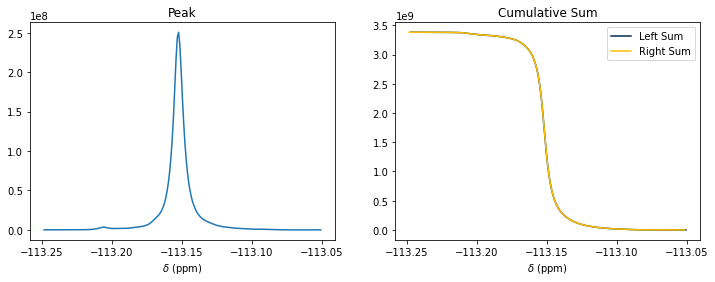

In [14]:
fx = S[0]['delta'].to_numpy()[1:-1]
fy = S[0]['y'].to_numpy()[1:-1]

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(fx,fy)
ax0.xaxis.set_major_locator(plt.MaxNLocator(5))
ax0.set_xlabel(r'$\delta$ (ppm)')
ax0.set_title('Peak')

ls = np.cumsum(fy[:-1])
rs = np.cumsum(fy[1:])
ax1.plot(fx[:-1],ls,color='#022851',label=f'Left Sum')
ax1.plot(fx[1:],rs,color='#ffbf00',label=f'Right Sum')
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel(r'$\delta$ (ppm)')
ax1.set_title('Cumulative Sum')
ax1.legend()

print(f'Left sum = {ls[-1]:.1f}, Right sum = {rs[-1]:.1f}')
print(f'Left integral = {ls[-1]*np.abs(fx[1]-fx[0]):.1f}, Right integral = {rs[-1]*np.abs(fx[1]-fx[0]):.1f}')


We have so many data points that are spaced so closely together that the left and right sums agree within 0.1%; the differences are in the 6th digit of the integral. However, if we had fewer data points, or if the points were not evenly spaced, the differences might have been larger. In such cases, the [Trapozoidal Rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) can be used. In practice, it gives a value in between the left sum integral and the right sum integral. When the points are evenly spaced, the trapezoid integration is exactly the average of the two.

The [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html) module contains a number of functions for numerical integration. When using discrete samples instead of analytical functions, there are three common functions to use:
- [`scipy.integrate.trapezoid`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html) Integrates using the trapezoid rule and returns the value of the integral. This function was renamed in Scipy 1.6.0; its old name was `trapz`, and that name is used below.
- [`scipy.integrate.cumulative_trapezoid`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html) Similar to `cumsum`, but contains the cumulative trapezoid rule integral instead of the cumulative sum. It was also renamed in Scipy 1.6.0; its old name was `cumtrapz`.
- [`scipy.integrate.simpson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html) Integrates using [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule), which approximates the function as a quadratic polynomial between points instead of as a line as in the trapezoid rule.

Left =	 3065501.7
Right =	 3065542.0
Trapz =	 3065521.8
Simps =	 3065518.2


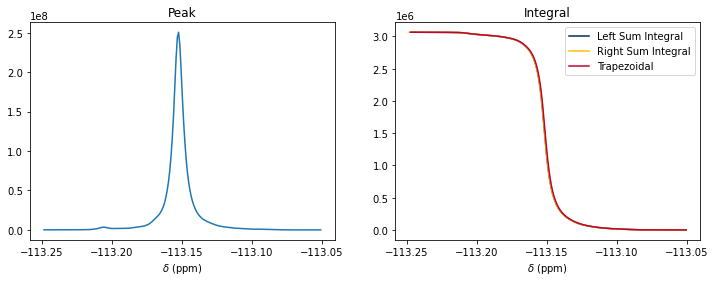

In [15]:
import scipy.integrate as spi

fx = S[0]['delta'].to_numpy()[1:-1]
fy = S[0]['y'].to_numpy()[1:-1]

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(fx,fy)
ax0.xaxis.set_major_locator(plt.MaxNLocator(5))
ax0.set_xlabel(r'$\delta$ (ppm)')
ax0.set_title('Peak')

ls = np.cumsum(fy[:-1])*np.abs(fx[1]-fx[0])
rs = np.cumsum(fy[1:])*np.abs(fx[1]-fx[0])
ts = -spi.cumtrapz(fy,fx)
ax1.plot(fx[:-1],ls,color='#022851',label=f'Left Sum Integral')
ax1.plot(fx[1:],rs,color='#ffbf00',label=f'Right Sum Integral')
ax1.plot(fx[:-1],ts,color='#c10230',label=f'Trapezoidal')
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel(r'$\delta$ (ppm)')
ax1.set_title('Integral')
ax1.legend()

print(f'Left =\t {ls[-1]:.1f}\nRight =\t {rs[-1]:.1f}\nTrapz =\t {-spi.trapz(fy,fx):.1f}\nSimps =\t {-spi.simps(fy,fx):.1f}')

Clearly, the method we choose to integrate this peak makes little difference! However, there is one potential issue with numerical integration which become more apparent if we zoom in vertically.

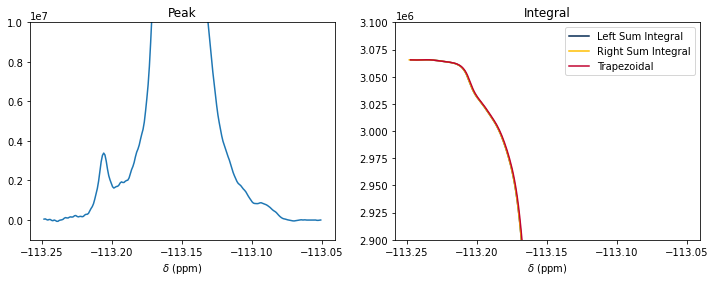

In [16]:
fx = S[0]['delta'].to_numpy()[1:-1]
fy = S[0]['y'].to_numpy()[1:-1]

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(fx,fy)
ax0.xaxis.set_major_locator(plt.MaxNLocator(5))
ax0.set_xlabel(r'$\delta$ (ppm)')
ax0.set_title('Peak')
ax0.set_ylim(-1e6,1e7)

ls = np.cumsum(fy[:-1])*np.abs(fx[1]-fx[0])
rs = np.cumsum(fy[1:])*np.abs(fx[1]-fx[0])
ts = -spi.cumtrapz(fy,fx)
ax1.plot(fx[:-1],ls,color='#022851',label=f'Left Sum Integral')
ax1.plot(fx[1:],rs,color='#ffbf00',label=f'Right Sum Integral')
ax1.plot(fx[:-1],ts,color='#c10230',label=f'Trapezoidal')
ax1.set_ylim(2.9e6,3.1e6)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel(r'$\delta$ (ppm)')
ax1.set_title('Integral')
ax1.legend()

There is a second peak at about -113.21 ppm that is also contributing to the value of the integral, probably arising from an impurity in the internal standard or one of the other reagents in the system. From the plot on the right, we can see that is contributes ~1% to the total integral, which might be a bit of a concern. It is also not such an easy task to eliminate the peak! We could change the integration limits, but because the interloper peak is sitting on the side of the peak of interest, we can't exclude it without also excluding the peak we are interested in. By eye, we can visualize what the spectrum would look like if that peak weren't there, so it would be nice to find a mathematical approach that reconstructs the spetrum without it.

## Lineshape Functions

A **lineshape function** is a mathematical function that describes the shape of a peak in spectrum. In spectroscopy (like NMR), we know from quantum mechanics that the frequency of light needed to cause a spectroscopic transition must equal the difference in energy between quantum states. However, there are some physical mechanisms that result in line broadening. In NMR, the raw signal is a **Free Induction Decay**, which is a cosine-like wave that exponentally decays over time. That exponential decay causes the spectral line in an NMR spectrum to take on a form very close to a **Lorentzian** lineshape:

$$ f(\delta) = \frac{A}{\pi}\frac{w}{(\delta - \delta_0)^2 + w^2} $$

where:
- $A$ is the peak area
- $w$ is the Half Width at Half Maximum (HWHM)
- $\delta_0$ is the center of the peak

The Lorentzian function looks like this:

Text(0, 0.5, '$f(\\delta)$')

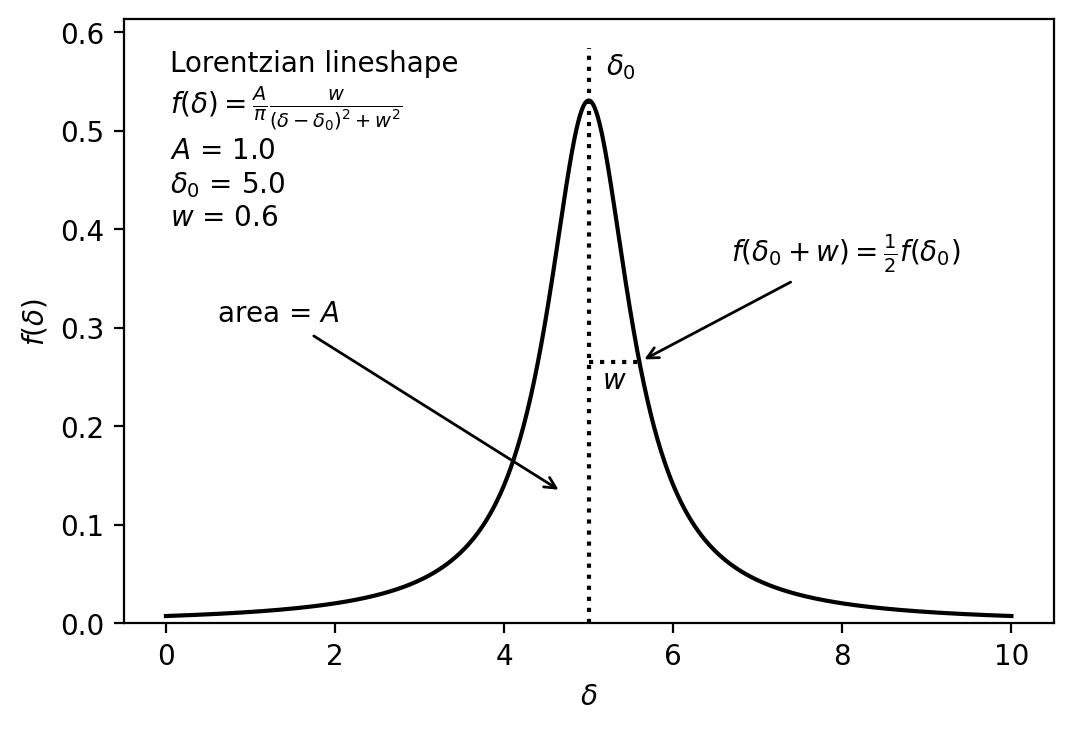

In [17]:
def lor(x,A,w,x0):
    return A/np.pi*w/((x-x0)**2. + w**2.)

A = 1.
w = 0.6
x0 = 5.0
xx = np.linspace(0,10,1000)
lory = lor(xx,A,w,x0)


fig,ax = plt.subplots(dpi=200)
ax.plot(xx,lory,'k-')

halfmax = lor(x0+w,A,w,x0)
ax.plot([x0,x0+w],[halfmax,halfmax],'k:')
ax.annotate('$w$',xy=(x0+w/2,halfmax-0.1*halfmax),ha='center')
ax.plot([x0,x0],[0,2.2*halfmax],'k:')
ax.annotate(r'$\delta_0$',xy=(x0+0.2,2.1*halfmax),ha='left')
ax.annotate(r'area = $A$',xy=(x0-w/2,0.5*halfmax),xytext=(0.1,0.5),textcoords='axes fraction',arrowprops={'arrowstyle':'->'})
ax.annotate(r'$f(\delta_0 + w) = \frac{1}{2}f(\delta_0)$',xy=(x0+w,halfmax),xytext=(0.9,0.6),textcoords='axes fraction',arrowprops={'arrowstyle':'->'},ha='right')
yl = ax.get_ylim()
ax.set_ylim(0,yl[1])

legtext = 'Lorentzian lineshape\n'
legtext += r'$f(\delta) = \frac{A}{\pi}\frac{w}{(\delta-\delta_0)^2 + w^2}$'
legtext += f'\n$A$ = {A:.1f}\n$\\delta_0$ = {x0:.1f}\n$w$ = {w:.1f}'
ax.annotate(legtext,xy=(0.05,0.95),xycoords='axes fraction',va='top')

ax.set_xlabel(r'$\delta$')
ax.set_ylabel(r'$f(\delta)$')

We can use the Lorentzian lineshape function to model the data. If we take the integrals that we calculated above and use that as the area, and guess at values for the HWHM and peak center, we can get reasonable agreement by just plugging in good guesses.

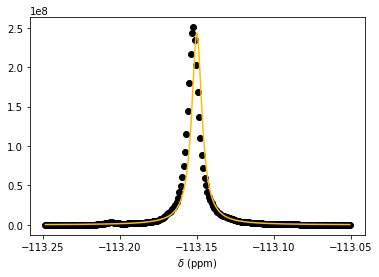

In [18]:
fx = S[0]['delta'].to_numpy()[1:-1]
fy = S[0]['y'].to_numpy()[1:-1]
xx = np.linspace(fx[0],fx[-1],1000)

fig,ax = plt.subplots()
ax.scatter(fx,fy,color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel(r'$\delta$ (ppm)')
ax.plot(xx,lor(xx,3.055e6,.004,-113.15),color='#ffbf00')

To quantify the "goodness of fit", we can take a look at the **residuals** between the model and the real data. For a data set consisting of points $(x_i,y_i)$ modeled by a function $f(x)$, the $i$th residual $r_i$ is defined as:

$$ r_i = y_i - f(x_i) $$

In a "good" fit, the residuals are scattered around 0 with no systematic trends. We can add a residual plot to the graph to visualize them.

Text(0, 0.5, 'Residuals')

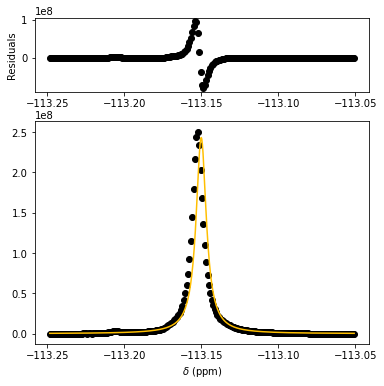

In [19]:
fx = S[0]['delta'].to_numpy()[1:-1]
fy = S[0]['y'].to_numpy()[1:-1]
xx = np.linspace(fx[0],fx[-1],1000)

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(6,6),gridspec_kw={'height_ratios': [1,3]})
ax1.scatter(fx,fy,color='black')
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel(r'$\delta$ (ppm)')
ax1.plot(xx,lor(xx,3.055e6,.004,-113.15),color='#ffbf00')

ax0.scatter(fx,fy-lor(fx,3.055e6,.004,-113.15),color='black')
ax0.xaxis.set_major_locator(plt.MaxNLocator(5))
ax0.set_ylabel('Residuals')

Clearly, our model can be improved. The way to do this rigorously is by varying the model parameters $A$, $w$, and $\delta_0$ and minimizing the sum of the squares of the residuals:

$$ SS = \sum_i r_i^2 $$

This process is called **least squares optimization**, and as discussed in this week's introduction, our model is nonlinear in the parameters, so performing the optimization requires solving coupled differential equations iteratively. Fortunately, the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) module contains a wide variety of functions that are designed to minimize, maximize, or find zeros of various functions or datasets. For the case of data that depend only on one independent variable, the [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function is especially convenient. We provide the function, the x and y data points, and initial guesses for the fit parameters, and then scipy carries out the nonlinear least squares optimization for us.

Take a look at the function documentation:

In [20]:
import scipy.optimize as opt

opt.curve_fit?

Signature:
opt.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 (if the number of parameters for the
    

In the list of arguments, `f` is the model function (in our case `lor`). That function needs to be in a particular form: its first argument must be the independent variable, and the remaining arguments are the parameters that will be optimized. Our `lor` function already satisfies this requirement. `xdata` and `ydata` are the data to fit, and `p0` is a list of initial guesses for the parameters. The size of `p0` must be the same as the number of parameters in the model function (i.e., one less than the total number of arguments). The parameters `sigma` and `absolute_sigma` can be used if the data points have error bars already associated with them. The `bounds` parameter can be used to place restrictions on the values of the parameters during the optimization by providing a list of tuples setting the min and max allowed value for each parameter. For instance, we know that the peak area must be a positive number, so we could set a bound of `(0,np.inf)`. If `bounds` is not set, then the parameters are allowed to take on any value, and sometimes the fit can go crazy (especially when the initial guesses are poor). `method` can be used to select a specific optimization algorithm (the default is usually fine), and `jac` allows you to pass a function that computes the Jacobian matrix if desired. Passing the Jacobian can speed up the calculation and make it slightly more accurate, but otherwise, the algorithm itself will approximate the Jacobian using finite differences, so it is usually not required.

The function returns 2 arrays (conventionally names `popt` and `pcov`, respectively) which contain the optimized parameter values and the covariance matrix, which is related to the uncertainties of the parameters. We'll discuss this more in a bit.

Now we'll use `curve_fit` to model our data:

In [21]:
fx = S[0]['delta'].to_numpy()[1:-1]
fy = S[0]['y'].to_numpy()[1:-1]

popt,pcov = opt.curve_fit(lor,fx,fy,p0=[3e6,.001,-113.15])

print(popt)
print(pcov)



[ 3.20783595e+06  4.06060743e-03 -1.13152354e+02]
[[ 3.24723544e+07  4.11094157e-02 -4.30166729e-06]
 [ 4.11094157e-02  1.04066376e-10 -2.16679045e-14]
 [-4.30166733e-06 -2.16679046e-14  5.20195906e-11]]


With the optimized parameters, we can now plot the best fit model and residuals:

Text(0, 0.5, 'Residuals')

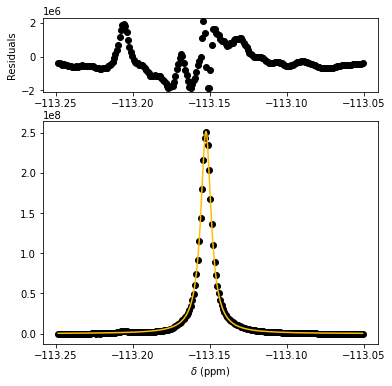

In [22]:
fx = S[0]['delta'].to_numpy()[1:-1]
fy = S[0]['y'].to_numpy()[1:-1]

popt,pcov = opt.curve_fit(lor,fx,fy,p0=[3e6,.001,-113.15])

xx = np.linspace(fx[0],fx[-1],1000)

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(6,6),gridspec_kw={'height_ratios': [1,3]})
ax1.scatter(fx,fy,color='black')
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel(r'$\delta$ (ppm)')

#note: we can use python's argument expansion to pass popt directly to the lor function
ax1.plot(xx,lor(xx,*popt),color='#ffbf00')

ax0.scatter(fx,fy-lor(fx,*popt),color='black')
ax0.xaxis.set_major_locator(plt.MaxNLocator(5))
ax0.set_ylabel('Residuals')

By eye, the model looks pretty good, though there is some extra structure in the residuals. This likely comes from 3 sources:
1. The actual lineshape of the data is probably described better by the [Voigt profile](https://en.wikipedia.org/wiki/Voigt_profile) rather than a Lorentzian.
2. For technical reasons, the NMR spectrum is not perfectly symmetric. This has to do with how the raw signals from the NMR are processed to convert them into spectra.
3. There is at least 1 impurity peak at -113.21 ppm, and there might be a second one at -113,17 ppm.


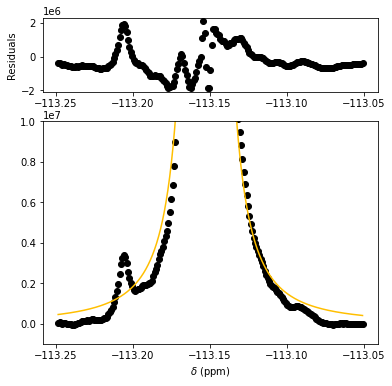

In [23]:
ax1.set_ylim(-1e6,1e7)
fig.patch.set_facecolor('white') #workaround for dark jupyterlab theme
fig

One noticeable deviation is that the "wings" of the model are a bit too wide; this could be improved by using a more sophisticated lineshape model like the Voigt function mentioned before. For simplicity, we will not do that here. However, the extra peak we can incorporate into the model by adding a second Lorentzian to the model function. This time we'll use the bounds parameter as an example. Without it, there is a chance that the model will decide that the second peak has both a negative area and width. While that may seem like a problem; note that `lor(x,A,w,x0) = lor(x,-A,-w,x0)`, so there is no real difference. Still, it's nice for the numbers to both be positive.

[ 3.20719947e+06  4.05947315e-03 -1.13152354e+02  1.18150115e+04
  1.63894119e-03 -1.13205882e+02]
[[ 2.97175672e+07  3.76397491e-02 -2.08981444e-06 -7.48990734e+05
  -1.17672476e-01 -6.43209036e-03]
 [ 3.76397491e-02  9.52084436e-11  9.60469691e-15 -1.27737003e-03
  -1.93533382e-10 -1.12868534e-11]
 [-2.08981444e-06  9.60469691e-15  4.75232661e-11  9.22542431e-05
   1.55228769e-11  1.04857321e-12]
 [-7.48990734e+05 -1.27737003e-03  9.22542431e-05  1.19753782e+07
   1.65690267e+00  1.32045956e-02]
 [-1.17672476e-01 -1.93533382e-10  1.55228769e-11  1.65690267e+00
   4.58793072e-07  4.46415900e-09]
 [-6.43209036e-03 -1.12868534e-11  1.04857321e-12  1.32045956e-02
   4.46415900e-09  2.31379213e-07]]


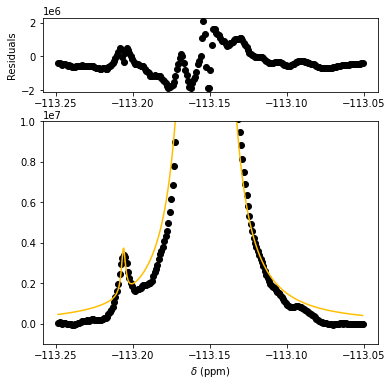

In [24]:
def lor2(x,A1,w1,x01,A2,w2,x02):
    return lor(x,A1,w1,x01) + lor(x,A2,w2,x02)

#bounds is a 2-tuple of arrays: first array contains min values and second contains max values
bounds = ([0,.001,-113.25,0,.001,-113.25],[np.inf,.01,-113.05,np.inf,.01,-113.05])

popt,pcov = opt.curve_fit(lor2,fx,fy,p0=[3e6,.004,-113.15,3e4,.004,-113.21],bounds=bounds)

xx = np.linspace(fx[0],fx[-1],1000)

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(6,6),gridspec_kw={'height_ratios': [1,3]})
ax1.scatter(fx,fy,color='black')
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel(r'$\delta$ (ppm)')
ax1.set_ylim(-1e6,1e7)
#note: we can use python's argument expansion to pass popt directly to the lor function
ax1.plot(xx,lor2(xx,*popt),color='#ffbf00')

ax0.scatter(fx,fy-lor2(fx,*popt),color='black')
ax0.xaxis.set_major_locator(plt.MaxNLocator(5))
ax0.set_ylabel('Residuals')

print(popt)
print(pcov)

The `pcov` array is the [**covariance matrix**](https://en.wikipedia.org/wiki/Covariance_matrix), and it can be used to obtain estimates of the uncertainties in the model parameters. The diagonal elements of the covariance matrix give the variances of the model parameters, and the off-diagonal elements are related to the correlation between the parameters (see the linked article for the relationship between the covariance matrix and the correlation matrix). We can obtain the 1$\sigma$ uncertainties on the parameters by taking the square root of the diagonal elements. In other words, this gives a measure of how much each parameter would need to change in order to double the standard deviation of the fit residuals, which is a good measure of how reliable the parameters are.

In [25]:
psigma = np.sqrt(np.diag(pcov))

print(f'A = {popt[0]:.1f} +/- {psigma[0]:.1f}')
print(f'w = {popt[1]:.7f} +/- {psigma[1]:.7f}')
print(f'x0 = {popt[2]:.7f} +/- {psigma[2]:.7f}')

A = 3207199.5 +/- 5451.4
w = 0.0040595 +/- 0.0000098
x0 = -113.1523538 +/- 0.0000069


After this analysis, we can see that the difference between the peak areas of the large peak with and without the extra small peak are virtually identical. But we also see that the estimate of the peak area is a few percent larger than our estimate from direct integration. It would be desirable to improve the lineshape model for the best quantitative analysis, but for now we will proceed by using both integration and curve fitting for the rest of our analysis.

## Kinetic Analysis

To do the kinetic analysis, we need to extract the areas for all of the peaks as a function of time.

In [26]:
def integrate_peak(x,y,method=spi.trapz):
    return np.abs(method(y,x)) #return absolute value since delta x is negative

int_list = []

for (t,r,p,s) in zip(time,R,P,S):
    il = [t]
    il.append(integrate_peak(r['delta'],r['y']))
    il.append(integrate_peak(p['delta'],p['y']))
    il.append(integrate_peak(s['delta'],s['y']))
    int_list.append(il)
    
int_df = pd.DataFrame(int_list,columns=['t','R','P','S'])
int_df

,t,R,P,S
0,7,7.609286e+07,1.054680e+06,3.065543e+06
1,37,7.351931e+07,2.652559e+06,3.001239e+06
2,67,7.245935e+07,4.207135e+06,3.027234e+06
3,97,7.103995e+07,5.761328e+06,3.020874e+06
4,127,6.893792e+07,7.120942e+06,3.004122e+06
5,158,6.735031e+07,8.611556e+06,3.009341e+06
6,187,6.534191e+07,9.736657e+06,2.952936e+06
7,217,6.353366e+07,1.122067e+07,2.951133e+06
8,246,6.198220e+07,1.251497e+07,2.912870e+06
9,276,6.020380e+07,1.371272e+07,2.923021e+06


Now we have the peak integrals as a function of time, and we can calculate the concentrations of R and P using the equations above. We'll also calculate \[R\] + \[P\], which should remain constant over time. Then, make a scatter plot:

,t,R,P,S,[R],[P],[R+P]
0,7,7.609286e+07,1.054680e+06,3.065543e+06,0.910139,0.012615,0.922754
1,37,7.351931e+07,2.652559e+06,3.001239e+06,0.898198,0.032407,0.930605
2,67,7.245935e+07,4.207135e+06,3.027234e+06,0.877647,0.050958,0.928605
3,97,7.103995e+07,5.761328e+06,3.020874e+06,0.862266,0.069930,0.932196
4,127,6.893792e+07,7.120942e+06,3.004122e+06,0.841419,0.086914,0.928333
5,158,6.735031e+07,8.611556e+06,3.009341e+06,0.820615,0.104926,0.925541
6,187,6.534191e+07,9.736657e+06,2.952936e+06,0.811352,0.120900,0.932252
7,217,6.353366e+07,1.122067e+07,2.951133e+06,0.789381,0.139412,0.928793
8,246,6.198220e+07,1.251497e+07,2.912870e+06,0.780220,0.157536,0.937756
9,276,6.020380e+07,1.371272e+07,2.923021e+06,0.755202,0.172014,0.927216


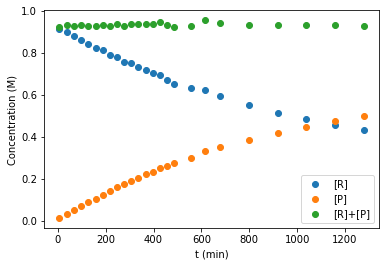

In [27]:
int_df['[R]'] = int_df['R']/3./int_df['S']*0.11
int_df['[P]'] = int_df['P']/3./int_df['S']*0.11
int_df['[R+P]'] = int_df['[R]']+int_df['[P]']

fig,ax = plt.subplots()
ax.scatter(int_df['t'],int_df['[R]'],label='[R]')
ax.scatter(int_df['t'],int_df['[P]'],label='[P]')
ax.scatter(int_df['t'],int_df['[R+P]'],label='[R]+[P]')

ax.set_xlabel('t (min)')
ax.set_ylabel('Concentration (M)')
ax.legend()
int_df

Now we can try to determine the reaction order in **R** by regression analysis of \[R\] vs time, ln \[R\] vs time, and 1/\[R\] vs time using `pingouin`.

/home/kyle/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.7, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Text(0.5, 0.9, 'R$^2$ = 0.9971')

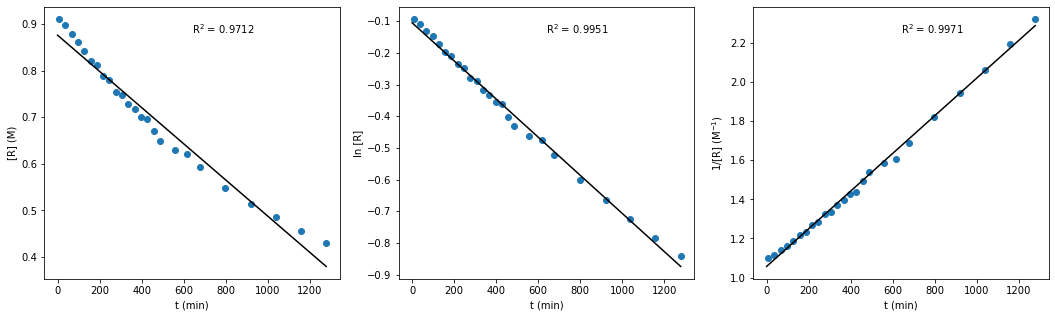

In [28]:
import pingouin as pg

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

xx = np.linspace(0,np.max(int_df['t']),1000)

ax1.scatter(int_df['t'],int_df['[R]'])
ax1.set_xlabel('t (min)')
ax1.set_ylabel('[R] (M)')

lr = pg.linear_regression(int_df['t'],int_df['[R]'])
ax1.plot(xx,lr['coef'][0]+lr['coef'][1]*xx,'k-')
ax1.annotate(f'R$^2$ = {lr["r2"][0]:.4f}',xy=(0.5,0.9),xycoords='axes fraction')


ax2.scatter(int_df['t'],np.log(int_df['[R]']))
ax2.set_xlabel('t (min)')
ax2.set_ylabel('ln [R]')
lr = pg.linear_regression(int_df['t'],np.log(int_df['[R]']))
ax2.plot(xx,lr['coef'][0]+lr['coef'][1]*xx,'k-')
ax2.annotate(f'R$^2$ = {lr["r2"][0]:.4f}',xy=(0.5,0.9),xycoords='axes fraction')

ax3.scatter(int_df['t'],1./int_df['[R]'])
ax3.set_xlabel('t (min)')
ax3.set_ylabel('1/[R] (M$^{-1}$)')
lr = pg.linear_regression(int_df['t'],1./int_df['[R]'])
ax3.plot(xx,lr['coef'][0]+lr['coef'][1]*xx,'k-')
ax3.annotate(f'R$^2$ = {lr["r2"][0]:.4f}',xy=(0.5,0.9),xycoords='axes fraction')

It's a tough call, but the linear correlation is best in the third plot, which suggests the reaction is second-order in the reactant. We can also perform a similar analysis with curve fitting, and it has the added bonus that we have a measure of the uncertainty of each peak area so we can calculate errors on the concentrations using [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Given peak areas $R$, $P$, and $S$ and their uncertainties $dR$, $dP$, and $dS$, the uncertainties on the concentrations are:

$$ d[\textbf{R}] = [\textbf{R}]\sqrt{ \left(\frac{dR}{R}\right)^2 + \left(\frac{dS}{S}\right)^2 + \left(\frac{d[\textbf{S}]}{[\textbf{S}]}\right)^2} $$

$$ d[\textbf{P}] = [\textbf{P}]\sqrt{ \left(\frac{dP}{P}\right)^2 + \left(\frac{dS}{S}\right)^2 + \left(\frac{d[\textbf{S}]}{[\textbf{S}]}\right)^2} $$

$$ d([\textbf{R}] + [\textbf{P}]) = \sqrt{d[\textbf{R}]^2 + d[\textbf{P}]^2} $$

From our initial analysis of $S$ and $dS$, we know that the ratio $dS/S$ is about 0.0001. We would expect similar uncertainties for all of the integrals. What remains is the last term: the uncertainty of the concentration of the internal standard. We have no information to assess this quantity, as it depends on how the sample was prepared. It is probably close to 1%, however, which would make it the leading source of uncertainty in the analysis. However, for now we will just neglect that term and assume that the internal standard concentration is known exactly (i.e., $d[\textbf{S}] = 0$)

,t,R,dR,P,dP,S,dS,[R],d[R],[P],d[P],[R+P],d[R+P]
0,7,8.076517e+07,145361.619396,1.138139e+06,2851.528210,3.207826e+06,5678.756992,0.923176,0.002331,0.013009,0.000040,0.936186,0.002331
1,37,7.860940e+07,220295.303528,2.845388e+06,8646.202269,3.169163e+06,15445.127510,0.909497,0.005113,0.032921,0.000189,0.942418,0.005117
2,67,7.672038e+07,133469.141907,4.458280e+06,8193.206398,3.171302e+06,5894.673469,0.887043,0.002258,0.051547,0.000135,0.938590,0.002262
3,97,7.506057e+07,127019.029432,6.077684e+06,10175.502589,3.166734e+06,5705.624032,0.869104,0.002148,0.070372,0.000173,0.939476,0.002155
4,127,7.304597e+07,142218.733237,7.566155e+06,16464.674393,3.150627e+06,6433.509167,0.850101,0.002398,0.088054,0.000263,0.938156,0.002413
5,158,7.136755e+07,115534.304552,9.111596e+06,14559.817957,3.141781e+06,7600.514302,0.832907,0.002424,0.106338,0.000308,0.939245,0.002444
6,187,6.905173e+07,199081.535483,1.036880e+07,29406.332230,3.087693e+06,11909.306225,0.819996,0.003949,0.123131,0.000589,0.943127,0.003992
7,217,6.736955e+07,124670.785658,1.182309e+07,19896.287358,3.090826e+06,12116.475772,0.799209,0.003465,0.140258,0.000598,0.939467,0.003516
8,246,6.554001e+07,117197.816605,1.319257e+07,21763.811768,3.068383e+06,5881.643875,0.783192,0.002053,0.157649,0.000399,0.940841,0.002091
9,276,6.346603e+07,173619.369534,1.437462e+07,40478.549632,3.024502e+06,7275.239262,0.769412,0.002803,0.174267,0.000645,0.943678,0.002876


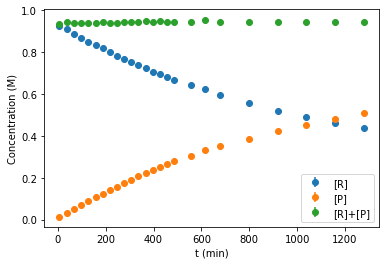

In [29]:
def fit_peak(x,y,w_guess):
    popt,pcov = opt.curve_fit(lor,x,y,p0=[0.5*w_guess*np.max(y),w_guess,x[np.argmax(y)]])
    
    return popt[0],np.sqrt(pcov[0][0])

int_list = []

for (t,r,p,s) in zip(time,R,P,S):
    il = [t]
    A,dA = fit_peak(r['delta'],r['y'],.004)
    il.append(A)
    il.append(dA)
    A,dA = fit_peak(p['delta'],p['y'],.004)
    il.append(A)
    il.append(dA)
    A,dA = fit_peak(s['delta'],s['y'],.004)
    il.append(A)
    il.append(dA)
    int_list.append(il)
    
int_df = pd.DataFrame(int_list,columns=['t','R','dR','P','dP','S','dS'])
int_df['[R]'] = int_df['R']/3/int_df['S']*0.11
int_df['d[R]'] = int_df['[R]']*np.sqrt( (int_df['dR']/int_df['R'])**2 + (int_df['dS']/int_df['S'])**2)
int_df['[P]'] = int_df['P']/3/int_df['S']*0.11
int_df['d[P]'] = int_df['[P]']*np.sqrt( (int_df['dP']/int_df['P'])**2 + (int_df['dS']/int_df['S'])**2)
int_df['[R+P]'] = int_df['[R]']+int_df['[P]']
int_df['d[R+P]'] = np.sqrt(int_df['d[R]']**2 + int_df['d[P]']**2)

fig,ax = plt.subplots()
ax.errorbar(int_df['t'],int_df['[R]'],yerr=int_df['d[R]'],fmt='o',label='[R]')
ax.errorbar(int_df['t'],int_df['[P]'],yerr=int_df['d[P]'],fmt='o',label='[P]')
ax.errorbar(int_df['t'],int_df['[R+P]'],yerr=int_df['d[R+P]'],fmt='o',label='[R]+[P]')

ax.set_xlabel('t (min)')
ax.set_ylabel('Concentration (M)')
ax.legend()

int_df


Even though we plotted the error bars, they're smaller than the sizes of the markers!

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

xx = np.linspace(0,np.max(int_df['t']),1000)

ax1.scatter(int_df['t'],int_df['[R]'])
ax1.set_xlabel('t (min)')
ax1.set_ylabel('[R] (M)')

lr = pg.linear_regression(int_df['t'],int_df['[R]'])
ax1.plot(xx,lr['coef'][0]+lr['coef'][1]*xx,'k-')
ax1.annotate(f'R$^2$ = {lr["r2"][0]:.4f}',xy=(0.5,0.9),xycoords='axes fraction')


ax2.scatter(int_df['t'],np.log(int_df['[R]']))
ax2.set_xlabel('t (min)')
ax2.set_ylabel('ln [R]')
lr = pg.linear_regression(int_df['t'],np.log(int_df['[R]']))
ax2.plot(xx,lr['coef'][0]+lr['coef'][1]*xx,'k-')
ax2.annotate(f'R$^2$ = {lr["r2"][0]:.4f}',xy=(0.5,0.9),xycoords='axes fraction')

ax3.scatter(int_df['t'],1./int_df['[R]'])
ax3.set_xlabel('t (min)')
ax3.set_ylabel('1/[R] (M$^{-1}$)')
lr = pg.linear_regression(int_df['t'],1./int_df['[R]'])
ax3.plot(xx,lr['coef'][0]+lr['coef'][1]*xx,'k-')
ax3.annotate(f'R$^2$ = {lr["r2"][0]:.4f}',xy=(0.5,0.9),xycoords='axes fraction')

Text(0.5, 0.9, 'R$^2$ = 0.9979')

With curve fitting, we obtain very similar results as we did with direct integration. Notice how quick this analysis is! We analyzed several hours of experimental data in seconds, once the code was written. This type of NMR experiment would be repeated several times with different reactant concentrations and different catalysts, so having a processing pipeline that can analyze the experimental results quickly is very helpful. The tables and figures produced here can do directly into reports and publications, the Jupyter notebook clearly shows how the analysis was done along the way. It also ensures that the data are processed reproducibly.